![](https://prod-edxapp.edx-cdn.org/static/edx.org/images/logo.790c9a5340cb.png)

# [IBM:DS0720EN Data Science and Machine Learning Capstone Project](https://www.edx.org/course/data-science-and-machine-learning-capstone-project)

## Problem Statement

The people of New York use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic?
Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

## Datasets

[311 complaint dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

All 311 Service Requests from 2010 to present. This information is automatically updated daily.

## Data Dictionary 



|N|Column|Description|
|---|---|---|
|1|**created_date**|Date SR  was created|
|2|**unique_key**|Unique identifier of a Service Request (SR) in the open data set|
|3|**complaint_type**|This is the fist level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.|
|4|**incident_zip**|Incident location zip code, provided by geo validation.|
|5|**incident_address**|House number of incident address provided by submitter.|
|6|**street_name**|Street name of incident address provided by the submitter|
|7|**city**|City of the incident location provided by geovalidation.|
|8|**resolution_description**|Describes the last action taken on the SR by the responding agency.  May describe next or future steps. |
|9|**borough**|Provided by the submitter and confirmed by geovalidation.|
|10|**latitude**|Geo based Lat of the incident location|
|11|**longitude**|Geo based Long of the incident location|
|12|**closed_date**|Date SR was closed by responding agency|
|13|**location_type**|Describes the type of location used in the address information |
|14|**status**|Status of SR submitted |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%reload_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, pickle

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.11.1
OS Windows 10 10.0.18362 SP0
pandas 0.25.3
numpy 1.17.4
matplotlib 3.1.1
seaborn 0.9.0
pickle The 'pickle' distribution was not found and is required by the application
Sun Feb 16 11:58:58 2020 W. Europe Standard Time

In [3]:
# load cleaned data
nyc = pd.read_csv('../results/nyc_clean.csv', parse_dates=['created_date','closed_date'])

In [4]:
nyc.shape

(5839587, 14)

In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839587 entries, 0 to 5839586
Data columns (total 14 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               datetime64[ns]
location_type             object
status                    object
dtypes: datetime64[ns](2), float64(3), int64(1), object(8)
memory usage: 623.7+ MB


In [6]:
nyc.isna().sum(axis=0)

created_date                   0
unique_key                     0
complaint_type                 0
incident_zip                   0
incident_address               0
street_name                    0
city                           0
resolution_description      7710
borough                        0
latitude                       0
longitude                      0
closed_date               121589
location_type                  0
status                         0
dtype: int64

## Q1: What is the Top Complaint Type?


Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? You need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.



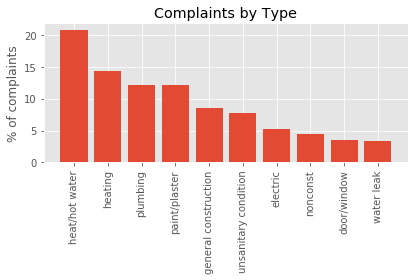

In [7]:
complaints = nyc['complaint_type'].value_counts()/len(nyc)*100

plt.style.use('ggplot')

plt.bar(complaints[:10].index, complaints[:10])

plt.title('Complaints by Type')
plt.ylabel('% of complaints')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
plt.close()

> Top4 types of complaints consists of complaints that occur oft (more than 10% of complaints appear in one of four categories: `heat/hot water`, `heating`, `plumbing`, `paint/plaster`) 

## Q2: What Areas Should the Agency Focus On?

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In this exercise, you will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type you decided to focus at the end of the last exercise.

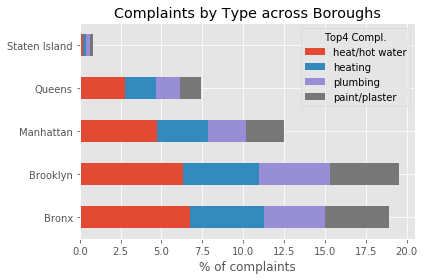

In [8]:
# Complaints by Type across Borough

Top4complaints_by_borough = pd.crosstab(nyc.borough, 
                                        nyc.complaint_type)[complaints[:4].index]/len(nyc)*100 

# plot stacked horizontal bar chart
Top4complaints_by_borough.plot.barh(stacked=True)

plt.title('Complaints by Type across Boroughs')
plt.ylabel(None)   
plt.xlabel('% of complaints')
plt.legend(title='Top4 Compl.')
 
plt.tight_layout()
plt.show()
plt.close()

> Bronx and Brooklyn hold on the first place by complaints, especially oft occur problems with heat/hot water. The Department of Housing Preservation and Development of New York City should focus on this problem first.

In [9]:
# 'heat/hot water' complaints
nyc_hhw = nyc[nyc.complaint_type == 'heat/hot water'].copy()

In [10]:
del nyc

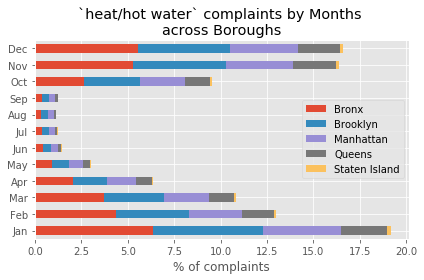

In [11]:
# % of complaints on `heat/hot water` by monthes across borough

(pd.crosstab(nyc_hhw.created_date.dt.month, 
             nyc_hhw.borough)/len(nyc_hhw)*100).plot.barh(stacked=True)

plt.title('`heat/hot water` complaints by Months \nacross Boroughs')
plt.ylabel(None)
plt.xlabel('% of complaints')
plt.yticks([i for i in range(0,12)],
           ['Jan', 'Feb', 'Mar',
            'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'])
plt.legend(title=None)
 
plt.tight_layout()
plt.show()
plt.close()

>The most tensed months with respect to problems with heat/hot water are months of cold season, namely first and forth quarters. This distribution is kept for any New York borough.

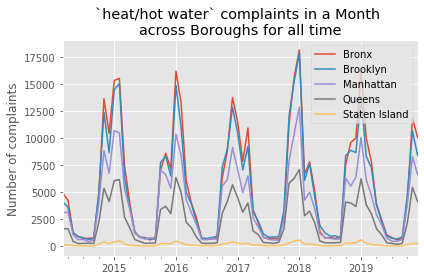

In [12]:
# Number of month complaints on `heat/hot water`across borough
pd.crosstab(nyc_hhw.created_date.dt.to_period('M'),
            nyc_hhw.borough).plot()

plt.title('`heat/hot water` complaints in a Month \nacross Boroughs for all time')
plt.xlabel(None)
plt.ylabel('Number of complaints')
plt.legend(title=None)

plt.tight_layout()
plt.show()
plt.close()

> For any year cold seasons are most busy time to respond the heat/hot water complaints. We could expect that month is an important piece of information in oder to predict a number of complaints.

In [13]:
# number of complaints in a day by an address
hhw = (nyc_hhw.groupby([nyc_hhw.created_date.dt.to_period('D'),
                      nyc_hhw.borough, 
                      nyc_hhw.incident_zip, 
                      nyc_hhw.incident_address])['city']
               .count()
               .reset_index()
               .rename(columns={'city':'complaints'})
)

In [14]:
del nyc_hhw

In [15]:
hhw.sample(5)

,created_date,borough,incident_zip,incident_address,complaints
44422,2014-11-01,Manhattan,10025.0,306 WEST 94 STREET,2
482914,2017-05-01,Queens,11693.0,195 BEACH 96 STREET,1
486629,2017-05-15,Queens,11374.0,65-08 AUSTIN STREET,1
642668,2018-05-08,Bronx,10461.0,1955 WILLIAMSBRIDGE ROAD,1
543876,2017-12-15,Queens,11101.0,34-17 42 STREET,1


In [16]:
# total number of complaints by an address
# streets where the complaints for heat/hot water are severe

hhw.groupby(['borough',
            'incident_zip',
            'incident_address'])['complaints'].sum().sort_values(ascending=False)

borough    incident_zip  incident_address        
Queens     11373.0       89-21 ELMHURST AVENUE       10371
Bronx      10472.0       1025 BOYNTON AVENUE          4899
Manhattan  10040.0       34 ARDEN STREET              4720
Brooklyn   11209.0       9511 SHORE ROAD              4085
Bronx      10462.0       2090 EAST TREMONT AVENUE     3533
                                                     ...  
Brooklyn   11208.0       463 GRANT AVENUE                1
                         463 ESSEX STREET                1
                         463 ELDERT LANE                 1
                         462 BERRIMAN STREET             1
Queens     11429.0       112-08 COLFAX STREET            1
Name: complaints, Length: 96733, dtype: int64

## Q3: Predict Complaint Types


Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

In this exercise, you will use a feature-engineered dataset to determine whether a predictive model can be built to predict the complaint (of the Complaint Type that you decided to focus on in Question 1) by using past data.

Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn_pandas import DataFrameMapper

In [18]:
# add new variables to dataset
hhw['month'] = hhw.created_date.dt.month
hhw['year'] = hhw.created_date.dt.year

In [19]:
# divide data into train and test data sets based on year 2019

Train = hhw.loc[hhw.created_date<'2019-01-01']
Test = hhw.loc[hhw.created_date>='2019-01-01']

In [20]:
# Train, tets data sets to predict an average number of complaints 
# in a month across borough

Train = Train.groupby(['borough', 'year',
                       'month'])['complaints'].sum().reset_index()

Train = Train.groupby(['borough', 'month'])['complaints'].mean().reset_index()


Test = Test.groupby(['borough','year',
                     'month'])['complaints'].sum().reset_index()

Test = Test.groupby(['borough', 'month'])['complaints'].mean().reset_index()


X_train = Train[['borough', 'month']]
y_train = Train['complaints']

X_test = Test[['borough','month']]
y_test = Test['complaints']

In [21]:
# # Features 
# convert the categorical varibale to binary variables
mapper = DataFrameMapper([
    ('month', None),
    ('borough', LabelBinarizer())
], df_out=True)

# preprocessing features data sets
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

###  Linear Regression Model

In [22]:
# fit a model

model = LinearRegression(normalize=True)
model.fit(Z_train, y_train)
model.score(Z_train, y_train)

0.286837414460124

In [23]:
# predict on test data

y_pred = model.predict(Z_test)

RSS = ((y_test-y_pred)**2).sum()
TSS = ((y_train.mean()-y_test)**2).sum()

R2 = 1.0 - RSS/TSS


Linear Regression Model

Model performance on test data R^2 = 0.2861886780348236
Baseline model prediction 3602.2383333333337
RSS = 667685068.3401054
TSS = 935380327.8181664


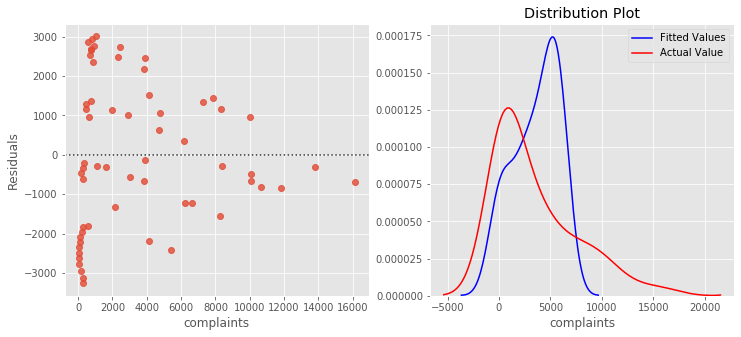

In [24]:
# Evaluate model performance on test data

print('\nLinear Regression Model\n')
print("Model performance on test data R^2 = {}".format(R2))
    
print("Baseline model prediction {}".format(y_train.mean()))
print("RSS = {}".format(RSS))
print("TSS = {}".format(TSS))

width = 12
height = 5

fig = plt.figure(figsize=(width, height))
ax1 = fig.add_subplot(121)
sns.residplot(y_test, y_pred)
plt.ylabel("Residuals")

ax2 = fig.add_subplot(122)
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" )
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
plt.title("Distribution Plot")

plt.show()
plt.close()

> The model is bad. Residuals distribution is not normal. Fitted values show also bad approximation of actual values.  

### CART Model

In [25]:
CARTmodel = DecisionTreeRegressor()
CARTmodel.fit(Z_train,y_train)
CARTmodel.score(Z_train, y_train)

1.0


CART Model

Model performance on test data R^2 = 0.9726909112151376
Baseline model prediction 3602.2383333333337
RSS = 25544384.419999998
TSS = 935380327.8181664


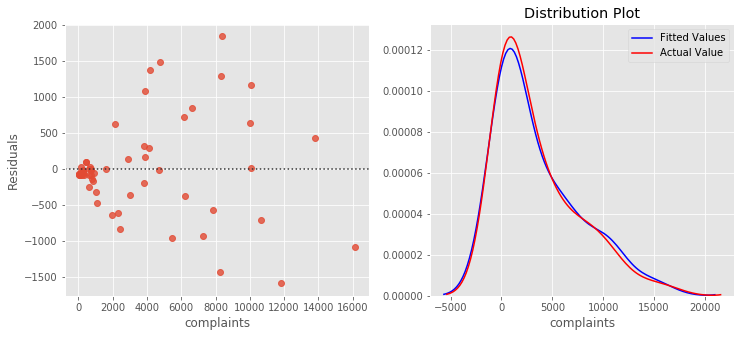

In [26]:
y_pred = CARTmodel.predict(Z_test)

RSS = ((y_test-y_pred)**2).sum()
TSS = ((y_train.mean()-y_test)**2).sum()

R2 = 1.0 - RSS/TSS

print("\nCART Model\n")
print("Model performance on test data R^2 = {}".format(R2))
    
print("Baseline model prediction {}".format(y_train.mean()))
print("RSS = {}".format(RSS))
print("TSS = {}".format(TSS))

width = 12
height = 5

fig = plt.figure(figsize=(width, height))
ax1 = fig.add_subplot(121)
sns.residplot(y_test, y_pred)
plt.ylabel("Residuals")

ax2 = fig.add_subplot(122)
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" )
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
plt.title("Distribution Plot")

plt.show()
plt.close()

> The CART model predicts good an average number of complains in a month across a borough